# Summary #

**Note: This notebook is a draft (and I can't promise when I'll fix that), so it may be incomplete in places. If you have questions, feel free to ask on [my talk page](https://meta.wikimedia.org/wiki/User_talk:Neil_P._Quinn-WMF).**

## History ##
First a little history. 

This analysis follows up on the work done by Aaron Halfaker in his [May 2015 visual editor experiment](https://meta.wikimedia.org/wiki/Research:VisualEditor's_effect_on_newly_registered_editors/May_2015_study). In that study, all the new accounts created on the English Wikipedia during one week [were divided evenly](https://meta.wikimedia.org/wiki/Research_talk:VisualEditor's_effect_on_newly_registered_editors/Work_log/2015-06-05) between a treatment group which was automatically offered the new visual editor alongside the existing wikitext editor and control group which was not.

That experiment helped win the English Wikipedia community's consent to start giving the visual editor to new users automatically. 

In turn, I am expanding Aaron's original cohort by looking at data for the incremental rollout to new editors. We started by giving the visual editor to 5% of new users, then 10%, then 25%, and so on up to 100%, where the level remains. Since we applied each percentage randomly, we can incorporate some of those users into the treatment and control groups. 

In addition, Aaron investigated the users for a week after their registration. I am expanding that to 60 days after their registration.

When I originally performed the follow-up with the original cohort, most of the results were fairly ho-hum, but I did find one intriguing effect: the visual editor group had a higher proportion of accounts who survived to make at least one edit more than 30 days after editing.

## Current issues ##
In discussion of reverts, I'm comparing reverted main edits to all edits—shouldn't have much effect but would be better to get straight.

# Cohort
In all of these stages, we determined whether to offer the user the visual editor by checking the modulus of their user ID ([code for the experiment](https://gerrit.wikimedia.org/r/#/c/68845/4/VisualEditor.hooks.php), [code for the incremental rollout](https://github.com/wikimedia/mediawiki-extensions-VisualEditor/blob/b550323b534b59622afefdf9bf9fbc23f177f46f/VisualEditor.hooks.php#L766)). In both cases, when the VE was being offered to users at x% = (1 / y ), a user got VE if ( userID % y = 0 ). Where the VE users and control users were not evenly matched, our matched control will be users where ( userID % y  = 1).

Our groups will *not* be perfectly matched, because many of the new accounts generated at the English Wikipedia are autocreated when users with accounts on other Wikimedia projects browse over to the English Wikipedia, not when users on the English Wikipedia click the "create account" button. Our cohort only includes the second group, because users who already have accounts on other projects are likely to behave quite differently.

This means that our list of newly created accounts will have random gaps where autocreated accounts used up the IDs. Since they're distributed randomly, this shouldn't affect our analysis.

The detailed schedule of these stages is [here](https://www.mediawiki.org/w/index.php?title=VisualEditor/Rollouts/English_Wikipedia&oldid=1934590).

First, we create a table to hold the users.

```
CREATE TABLE `ve_experiment_expanded` (
  `user_id` INT NOT NULL,
  `registration` VARBINARY(14) NOT NULL,
  `bucket` ENUM("treatment", "control") NOT NULL,
  `mobile_registered` BOOLEAN DEFAULT NULL,
  PRIMARY KEY (`user_id`)
);
```

## Pilot ##

```
INSERT INTO staging.ve_experiment_expanded
SELECT 
    event_userId AS user_id, 
    timestamp AS registration,
    CASE
        WHEN event_userId % 2 = 0 THEN "treatment"
        WHEN event_userId % 2 = 1 THEN "control"
    END AS bucket,
    IF( ( event_displayMobile OR NOT event_isSelfMade ), 1, 0 ) AS mobile_registered
FROM ServerSideAccountCreation_5487345
WHERE
    timestamp >= "201505211500" AND
    timestamp <  "201505221501" AND
    wiki = "enwiki" AND
    ( event_userId % 2 =  0 || event_userId % 2 = 1 )
;
```

## Experiment ##
```
INSERT INTO staging.ve_experiment_expanded
SELECT 
    event_userId AS user_id, 
    timestamp AS registration,
    CASE
        WHEN event_userId % 2 = 0 THEN "treatment"
        WHEN event_userId % 2 = 1 THEN "control"
    END AS bucket,
    IF( ( event_displayMobile OR NOT event_isSelfMade ), 1, 0 ) AS mobile_registered
FROM ServerSideAccountCreation_5487345
WHERE
    timestamp >= "201505282304" AND
    timestamp <  "201506042328" AND
    wiki = "enwiki" AND
    ( event_userId % 2 =  0 || event_userId % 2 = 1 )
;
```

## 5% rollout ##
```
INSERT INTO staging.ve_experiment_expanded
SELECT 
    event_userId AS user_id, 
    timestamp AS registration,
    CASE
        WHEN event_userId % 20 = 0 THEN "treatment"
        WHEN event_userId % 20 = 1 THEN "control"
    END AS bucket,
    IF( ( event_displayMobile OR NOT event_isSelfMade ), 1, 0 ) AS mobile_registered
FROM ServerSideAccountCreation_5487345
WHERE
    timestamp >= "201507281503" AND
    timestamp <  "201508041513" AND
    wiki = "enwiki" AND
    ( event_userId % 20 =  0 || event_userId % 20 = 1 )
;
```

## 10% rollout ##
```
INSERT INTO staging.ve_experiment_expanded
SELECT 
    event_userId AS user_id, 
    timestamp AS registration,
    CASE
        WHEN event_userId % 10 = 0 THEN "treatment"
        WHEN event_userId % 10 = 1 THEN "control"
    END AS bucket,
    IF( ( event_displayMobile OR NOT event_isSelfMade ), 1, 0 ) AS mobile_registered
FROM ServerSideAccountCreation_5487345
WHERE
    timestamp >= "201508041513" AND
    timestamp <  "201508132303" AND
    wiki = "enwiki" AND
    ( event_userId % 10 =  0 || event_userId % 10 = 1 )
;
```

## 25% rollout ##
```
INSERT INTO staging.ve_experiment_expanded
SELECT 
    event_userId AS user_id, 
    timestamp AS registration,
    CASE
        WHEN event_userId % 4 = 0 THEN "treatment"
        WHEN event_userId % 4 = 1 THEN "control"
    END AS bucket,
    IF( ( event_displayMobile OR NOT event_isSelfMade ), 1, 0 ) AS mobile_registered
FROM ServerSideAccountCreation_5487345
WHERE
    timestamp >= "201508132303" AND
    timestamp <  "201508201525" AND
    wiki = "enwiki" AND
    ( event_userId % 4 =  0 || event_userId % 4 = 1 )
;
```

## 50% rollout ##
```
INSERT INTO staging.ve_experiment_expanded
SELECT 
    event_userId AS user_id, 
    timestamp AS registration,
    CASE
        WHEN event_userId % 2 = 0 THEN "treatment"
        WHEN event_userId % 2 = 1 THEN "control"
    END AS bucket,
    IF( ( event_displayMobile OR NOT event_isSelfMade ), 1, 0 ) AS mobile_registered
FROM ServerSideAccountCreation_5487345
WHERE
    timestamp >= "201508201525" AND
    timestamp <  "201509011503" AND
    wiki = "enwiki" AND
    ( event_userId % 2 =  0 || event_userId % 2 = 1 )
;
```

In [64]:
%matplotlib inline

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Data

```
mysql -h analytics-store.eqiad.wmnet -u research -e "
SELECT
    user_id,
    registration,
    bucket,
    mobile_registered
FROM staging.ve_experiment_expanded
;" > ~/VE_experiment_cohort.tsv
```

Then, I generate a dataset of all the edits made by accounts from the experiment in our time period. This is based on [Aaron's code](https://github.com/halfak/VE_newcomers_May_2015/blob/master/sql/experimental_user_revision_stats.sql).

```
mysql -h analytics-store.eqiad.wmnet -u research -e "
SELECT
    user_id,
    current.rev_id AS rev_id,
    current.rev_timestamp AS rev_timestamp,
    ct_tag IS NOT NULL AS ve_used,
    CAST(current.rev_len AS INT) -
        CAST(IFNULL(parent.rev_len, 0) AS INT) as change_in_bytes
FROM staging.ve_experiment_expanded
INNER JOIN enwiki.revision current
    ON user_id = current.rev_user
LEFT JOIN enwiki.revision parent
    ON parent.rev_id = current.rev_parent_id
LEFT JOIN enwiki.change_tag  
    ON ct_rev_id = current.rev_id AND
    ct_tag = 'visualeditor'
WHERE
    current.rev_timestamp BETWEEN
       '20150521150000' AND
        DATE_FORMAT( DATE_ADD( '20150901150300', INTERVAL 60 DAY ), '%Y%m%d%H%i%S' ) AND
    current.rev_timestamp BETWEEN 
        registration AND
        DATE_FORMAT( DATE_ADD( registration, INTERVAL 60 DAY ), '%Y%m%d%H%i%S' )
;" > ~/VE_experiment_revs.tsv
```

The where clause limits it to revisions made after the first registration but within 60 days after the last.

Now, to load the data.

In [3]:
revs = pd.read_table( "./VE_experiment_revs.tsv" )
users = pd.read_table( "./VE_experiment_cohort.tsv" )

In [4]:
users.tail()

,user_id,registration,bucket,mobile_registered
148969,26149206,20150901150222,treatment,1
148970,26149207,20150901150224,control,0
148971,26149209,20150901150234,control,1
148972,26149211,20150901150252,control,0
148973,26149212,20150901150259,treatment,1


In [5]:
revs.tail()

,user_id,rev_id,rev_timestamp,ve_used,change_in_bytes
259211,26144196,688297870,20151030234520,0,18
259212,26144196,688299594,20151031000211,1,338
259213,26144196,688299697,20151031000259,0,16
259214,26144196,688300350,20151031000925,1,403
259215,26144196,688300390,20151031000949,0,19


In [6]:
revs = pd.merge(revs, users, on = "user_id", how = "left" )

revs.tail()

,user_id,rev_id,rev_timestamp,ve_used,change_in_bytes,registration,bucket,mobile_registered
259211,26144196,688297870,20151030234520,0,18,20150901002418,treatment,0
259212,26144196,688299594,20151031000211,1,338,20150901002418,treatment,0
259213,26144196,688299697,20151031000259,0,16,20150901002418,treatment,0
259214,26144196,688300350,20151031000925,1,403,20150901002418,treatment,0
259215,26144196,688300390,20151031000949,0,19,20150901002418,treatment,0


We're not interested in people who primarily use Wikipedia on mobile devices, because the visual editor is only widely available on desktop computers. Unfortunately, there's no simple ways to tell if someone is a mobile only user, but from past experience, registering the account from a mobile device is a pretty good proxy. So we'll exclude users who signed up using an app or the mobile web interface.

In [7]:
users = users[ users["mobile_registered"] == 0 ]
revs = revs[ revs["mobile_registered"] == 0] 

Make timestamps be actual date-time objects.

In [8]:
revs["rev_timestamp"] = pd.to_datetime( revs["rev_timestamp"], format="%Y%m%d%H%M%S" )
revs["registration"] = pd.to_datetime( revs["registration"], format="%Y%m%d%H%M%S" )
revs.tail()

,user_id,rev_id,rev_timestamp,ve_used,change_in_bytes,registration,bucket,mobile_registered
259211,26144196,688297870,2015-10-30 23:45:20,0,18,2015-09-01 00:24:18,treatment,0
259212,26144196,688299594,2015-10-31 00:02:11,1,338,2015-09-01 00:24:18,treatment,0
259213,26144196,688299697,2015-10-31 00:02:59,0,16,2015-09-01 00:24:18,treatment,0
259214,26144196,688300350,2015-10-31 00:09:25,1,403,2015-09-01 00:24:18,treatment,0
259215,26144196,688300390,2015-10-31 00:09:49,0,19,2015-09-01 00:24:18,treatment,0


Add the number of revisions to the `users` frame.

In [9]:
revs_by_user = revs.groupby( "user_id" )[ "rev_id" ].size().to_frame().reset_index()

revs_by_user.rename( columns = { 0: "revs" }, inplace = True )

users = pd.merge( users, revs_by_user, on = "user_id", how = "left" )

users.fillna( 0, inplace = True )

users.tail()

,user_id,registration,bucket,mobile_registered,revs
76853,26149202,20150901150132,treatment,0,0.0
76854,26149203,20150901150146,control,0,0.0
76855,26149205,20150901150219,control,0,0.0
76856,26149207,20150901150224,control,0,0.0
76857,26149211,20150901150252,control,0,2.0


# Utility methods

In [10]:
def verbose_chisquared( name_1, n_1, k_1, name_2, n_2, k_2 ):
    print( name_1, "n:", n_1 )
    print( name_1, "k:", k_1 )
    print( name_1, "rate:", k_1 / n_1 )
    print( "-----" )
    
    print( name_2, "n:", n_2 )
    print( name_2, "k:", k_2 )
    print( name_2, "rate:", k_2 / n_2 )
    print( "-----" )
    
    combined_rate = ( k_1 + k_2 ) / ( n_1 + n_2 )
    print( stats.chisquare( [k_1, k_2 ], [ n_1 * combined_rate, n_2 * combined_rate] ) )
    
def verbose_mannwhitneyu( name_1, series_1, name_2, series_2 ):
    print( name_1, "average:", round( series_1.mean(), 3 ) )
    print( name_2, "average:", round( series_2.mean(), 3 ) )
    print( stats.mannwhitneyu( series_1, series_2 ) )

# Analysis

In [11]:
treatment_users = users[ users[ "bucket" ] == "treatment" ]
n_treatment = len( treatment_users )

control_users = users[ users[ "bucket" ] == "control" ]
n_control = len( control_users )

## Productivity

None of the productivity variables in Aaron's original study showed anything close to a significant effect, so I'll just re-test the simplest two: (1) the total number of edits per user and (2) the proportion of users who made at least one edit.

In [12]:
treatment_by_revs = treatment_users["revs"]
control_by_revs = control_users["revs"]

For total edits, I use the [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann–Whitney_U_test), also know as the Wilcoxon ranked-sum test.

In [13]:
verbose_mannwhitneyu( "VE", treatment_by_revs, "control", control_by_revs )

VE average: 2.736
control average: 2.942
MannwhitneyuResult(statistic=737747609.5, pvalue=0.41702303223262732)


So p = 0.841 (the function returns a one-sided p value). No significance.

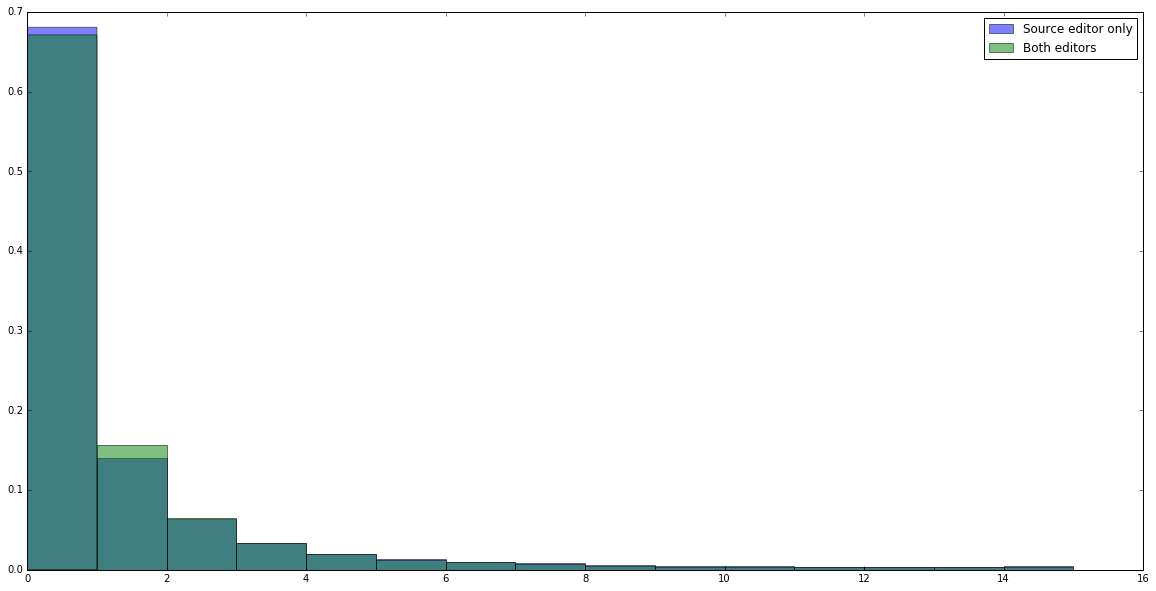

In [95]:
fig, axarr = plt.subplots( 1, 1, figsize=(20,10) )
plt.hist(control_by_revs, alpha = 0.5, range = (0, 15), normed = 1, bins = 15, label = "Source editor only")
plt.hist(treatment_by_revs, alpha = 0.5, range = (0, 15), normed = 1, bins = 15, label = "Both editors")
plt.legend(loc="upper right")
plt.show()

We can try again, 

For the proportion who edited at least once, I use [Pearson's chi-squared test](https://en.wikipedia.org/wiki/Pearson's_chi-squared_test).

In [14]:
treatment_editors = treatment_by_revs[ treatment_by_revs >= 1 ].count()
control_editors = control_by_revs[ control_by_revs >= 1 ].count()

verbose_chisquared( "treatment", n_treatment, treatment_editors, "control", n_control, control_editors )

treatment n: 38365
treatment k: 13343
treatment rate: 0.347790955298
-----
control n: 38493
control k: 13126
control rate: 0.340997064401
-----
Power_divergenceResult(statistic=2.5752332123793669, pvalue=0.10854810298815173)


p = 0.120. Not significant, but fairly low. However, the actual difference in editing proportion (35.2% with visual editor vs 34.5% without) isn't really anything to write home about.

## Block rate
First, let me see whether [Aaron's block-categorizing regexes](https://meta.wikimedia.org/wiki/Research_talk:VisualEditor's_effect_on_newly_registered_editors/Work_log/2015-05-28#Block_rates_and_types) cover all the blocks on these expanded set of users.

```
SELECT 
	user_name, 
	log_comment
FROM enwiki.logging 
INNER JOIN enwiki.user 
	ON REPLACE(log_title, "_", " ") = user_name 
INNER JOIN staging.ve_experiment_expanded
	USING (user_id) 
WHERE
	log_type = "block" AND
	log_action = "block" AND
	log_timestamp BETWEEN "201505211500" AND "201509011503" AND
	log_comment NOT RLIKE "(S|s)pam" AND
	log_comment NOT RLIKE "((V|v)and|(D|d)isrupt|(U|u)w-vaublock|(A|a)bus(e|ing)|(A|a)ttack|(D|d)eliberate|NOTHERE)" AND
	log_comment NOT RLIKE "((S|s)ock|(C|c)heckuser|(E|e)vasion)" AND
	log_comment NOT RLIKE "softerblock|soft block" AND
	log_comment NOT RLIKE "(U|u)w-uhblock|user\.\.\.|(U|u)w-ublock"
;
```

```
169 rows affected; taking 27.5 s
```

Okay, so it needs a little more work.

```
SELECT 
	user_name, 
	log_comment
FROM enwiki.logging 
INNER JOIN enwiki.user 
	ON REPLACE(log_title, "_", " ") = user_name 
INNER JOIN staging.ve_experiment_expanded
	USING (user_id) 
WHERE
log_type = "block" AND
log_action = "block" AND
log_timestamp BETWEEN "201505211500" AND "201509011503" AND
log_comment NOT RLIKE # Hard username blocks
    "(U|u)w-u(h)?block|user..." 
     AND
log_comment NOT RLIKE # Soft username blocks
    "(U|u)ser(\\s)?name|soft(er|est)?(\\s)?block|botublock|causeblock|organization|one person" 
     AND
log_comment NOT RLIKE # Spam
    "(S|s)pam|(A|a)dvertising|(P|p)romotional" 
    AND
log_comment NOT RLIKE # Obvious abuse
    "(V|v)and|(D|d)isrupt|(U|u)w-vaublock|(A|a)bus(e|ing)|(A|a)ttack|(D|d)eliberate|NOTHERE|not here|LTA|(T|t)roll|(H|h)arassment|(P|p)atent nonsense|(I|i)nsult" 
     AND
log_comment NOT RLIKE # Policy violation
	"(C|c)opyright|(B|b)iographies|BLP|POV|(W|w)arring|(T|t)hree-revert|(U|u)nsourced|(L|l)egal threat"
    AND
log_comment NOT RLIKE # Sockpuppetry
	"SOCK|(S|s)ock|(C|c)heck(U|u)ser|(E|e)va(de|sion)|(M|m)eatpuppet"
;
```

```
39 rows affected, taking 13.0 s
```

That's better; the only blocks left are ones whose comments are miscellaneous ("Persistent use of Wikipedia as a social media network", "As per [[User:CURRENT RESEARCH IN CHEMISTRY AND PHARMACEUTICAL SCIENCES-INTERNATIONAL JOURNAL]]", "You have been blocked for testing purposes"), nonspecific ("Please see your talk page for a full explanation", "so many possible reasons; pick your favourite!", "No thanks."), or empty. I'm not going to include the full list because some of the usernames are thoroughly toxic.

*What about accounts blocked multiple times? for example, https://en.wikipedia.org/w/index.php?title=Special:Log/block&page=Majorwith?*

Some block comments match multiple regexes (e.g. `{{uw-spamublock}} <!-- Promotional username, promotional edits -->: <!-- see also: [[User:Wiz vlogging and gaming]] -->` would match both spam and username regexes. However in the select statement, the block will match at most one—preferring the first in the query.

Now, let's get all these blocks categorized as above.
```
mysql -h analytics-store.eqiad.wmnet -u research -e "
SELECT
	user_id,
	bucket,
	IF( log_comment RLIKE
   		"(U|u)w-u(h)?block|user...", 
   		"hard username",
	IF( log_comment RLIKE
    	"(U|u)ser(\\s)?name|soft(er|est)?(\\s)?block|botublock|causeblock|organization|one person",
    	"soft username",
    IF( log_comment RLIKE 
		"(S|s)pam|(A|a)dvertising|(P|p)romotional",
		"spam",
	IF( log_comment RLIKE
    	"(V|v)and|(D|d)isrupt|(U|u)w-vaublock|(A|a)bus(e|ing)|(A|a)ttack|(D|d)eliberate|NOTHERE|not here|LTA|(T|t)roll|(H|h)arassment|(P|p)atent nonsense|(I|i)nsult",
    	"abuse", 
    IF( log_comment RLIKE
    	"(C|c)opyright|(B|b)iographies|BLP|POV|(W|w)arring|(T|t)hree-revert|(U|u)nsourced|(L|l)egal threat",
		"policy violation",
	IF( log_comment RLIKE
		"SOCK|(S|s)ock|(C|c)heck(U|u)ser|(E|e)va(de|sion)|(M|m)eatpuppet",
		"sockpuppetry",
	"other"
	) ) ) ) ) ) AS "block reason"
FROM enwiki.logging 
INNER JOIN enwiki.user 
	ON REPLACE(log_title, "_", " ") = user_name 
INNER JOIN staging.ve_experiment_expanded
	USING (user_id)
WHERE 
	log_type = "block" AND 
	log_action = "block" AND 
	log_timestamp BETWEEN "201505211500" AND "201509011503"
;" > ~/VE_experiment_block.tsv
```

In [15]:
blocks = pd.read_table( "./VE_experiment_blocks.tsv" )

blocks.tail()

,user_id,bucket,timestamp,block reason
4065,26144652,treatment,20150901134816,spam
4066,26141638,treatment,20150901134936,spam
4067,26144368,treatment,20150901135014,spam
4068,25336587,control,20150901140413,policy violation
4069,26147382,treatment,20150901142955,hard username


In [16]:
blocks_by_user = blocks.groupby( "user_id" ).size().to_frame().reset_index()

blocks_by_user.rename( columns = { 0: "blocked" }, inplace = True )

users_blocks = pd.merge( users, blocks_by_user, on="user_id", how="left" )

users_blocks[ "blocked" ].fillna( 0, inplace = True )

print( users_blocks.groupby( "blocked" ).size() )

print( blocks.groupby( "block reason" ).size() )

blocked
0.0    73485
1.0     3362
2.0       10
3.0        1
dtype: int64
block reason
abuse               1399
hard username       1482
other                 39
policy violation      49
sockpuppetry         230
soft username        219
spam                 652
dtype: int64


Only 11 users were blocked multiple times, so it seems fair to just reduce it to a boolean reflecting whether the user was ever blocked.

In [17]:
users_blocks.at[ users_blocks[ "blocked"] > 1, "blocked" ] = 1
users_blocks.groupby( "blocked" ).size()

blocked
0.0    73485
1.0     3373
dtype: int64

In [18]:
treatment_blocked = users_blocks[ ( users_blocks[ "blocked" ] == 1 ) & ( users_blocks[ "bucket" ] == "treatment" ) ].count( )["user_id"]
control_blocked = users_blocks[ ( users_blocks[ "blocked" ] == 1 ) & ( users_blocks[ "bucket" ] == "control" ) ].count( )["user_id"]

verbose_chisquared( "VE", n_treatment, treatment_blocked, "control", n_control, control_blocked )

VE n: 38365
VE k: 1687
VE rate: 0.0439723706503
-----
control n: 38493
control k: 1686
control rate: 0.0438001714597
-----
Power_divergenceResult(statistic=0.012982634558350057, pvalue=0.90928427489137398)


So the visual editor make no difference when it came to blocks. This makes sense; there's no reason that making it easier to edit would drive away bad-faith actors.

## Revert rate
To calculate the revert rate, I use Aaron's script [python-mwmetrics](https://github.com/mediawiki-utilities/python-mwmetrics). By default, it checks for reverts in the next 48 hours and 15 edits, whichever is less, after the edit in question. The [revert checking](https://github.com/mediawiki-utilities/python-mediawiki-utilities/blob/3edd1cc3754e71f8f77ba4c53c406934818d6b99/mw/lib/reverts/database.py) uses hashes. If an edit within the follow-up window has the same hash as one of edit's close parents, it's considered to have been reverted.

I [tweaked the script](https://github.com/neilpquinn/hacky-mwrevert-detector/blob/3c10fb9e5a0b4357a43ae267c105b9f9eb797f67/mwmetrics/utilities/new_users.py) to look for reverts across the users' first sixty days.

I had to exclude one user from the cohort (ID 26048397) because of a [strange inconsistency](https://lists.wikimedia.org/pipermail/analytics/2015-December/004697.html) between database tables.

In [19]:
reverts = pd.read_table( "./VE_experiment_reverts.tsv" )
reverts.drop("user_registration", axis = 1, inplace = True )

users_reverts = pd.merge( users, reverts, on = "user_id", how = "left" )

treatment_reverts = users_reverts[ users_reverts["bucket"] == "treatment" ][ "reverted_content_revisions" ]
control_reverts = users_reverts[ users_reverts["bucket"] == "control" ][ "reverted_content_revisions" ]

users_reverts.tail()

,user_id,registration,bucket,mobile_registered,revs,reverted_content_revisions
76853,26149202,20150901150132,treatment,0,0.0,0
76854,26149203,20150901150146,control,0,0.0,0
76855,26149205,20150901150219,control,0,0.0,0
76856,26149207,20150901150224,control,0,0.0,0
76857,26149211,20150901150252,control,0,2.0,0


In [20]:
print( "average edits:", round( users_reverts[ "revs" ].mean(), 3 ) )

verbose_mannwhitneyu( "VE", treatment_reverts, "control", control_reverts )

average edits: 2.839
VE average: 0.288
control average: 0.338
MannwhitneyuResult(statistic=736083628.5, pvalue=0.22645794131143487)


Interesting. It's not significant, but there *is* an appreciable difference, with VE users getting reverted a bit less. Maybe this will become significant if we distill things a bit by filtering out the users who never edited.

In [21]:
editors_reverts = users_reverts[ users_reverts["revs"] > 0 ]
treatment_reverts = editors_reverts[ editors_reverts["bucket"] == "treatment" ][ "reverted_content_revisions" ]
control_reverts = editors_reverts[ editors_reverts["bucket"] == "control" ][ "reverted_content_revisions" ]

print( "average edits:", round( editors_reverts[ "revs" ].mean(), 3 ) )
verbose_mannwhitneyu( "VE", treatment_reverts, "control", control_reverts )

average edits: 8.244
VE average: 0.828
control average: 0.991
MannwhitneyuResult(statistic=85926513.0, pvalue=0.0040913422223638387)


Wow, that is significant, even at a stringent p = 0.01 level. To understand the size of the effect, you could think of it this way: the average new editor who edits at all makes 9 edits in their first 60 days and sees one of those edits reverted. In the VE group, one editor in five is able to avoid that revert.

In [77]:
editors_reverts.loc[:, "proportion_reverted"] = editors_reverts["reverted_content_revisions"] / editors_reverts["revs"]

editors_reverts.fillna(value = 0, inplace = True)
treatment_rv_prop = editors_reverts[ editors_reverts["bucket"] == "treatment" ]["proportion_reverted"]
control_rv_prop = editors_reverts[ editors_reverts["bucket"] == "control" ]["proportion_reverted"]

/Applications/Miniconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Applications/Miniconda/lib/python3.5/site-packages/pandas/core/frame.py:2756: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [78]:
verbose_mannwhitneyu( "VE", treatment_rv_prop, "control", control_rv_prop )

VE average: 0.218
control average: 0.223
MannwhitneyuResult(statistic=86605768.5, pvalue=0.06038896316585847)


(array([ 1165.,   329.,   147.,    68.,    45.,    33.,    21.,    15.,
           13.,    15.]),
 array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.]),
 <a list of 10 Patch objects>)

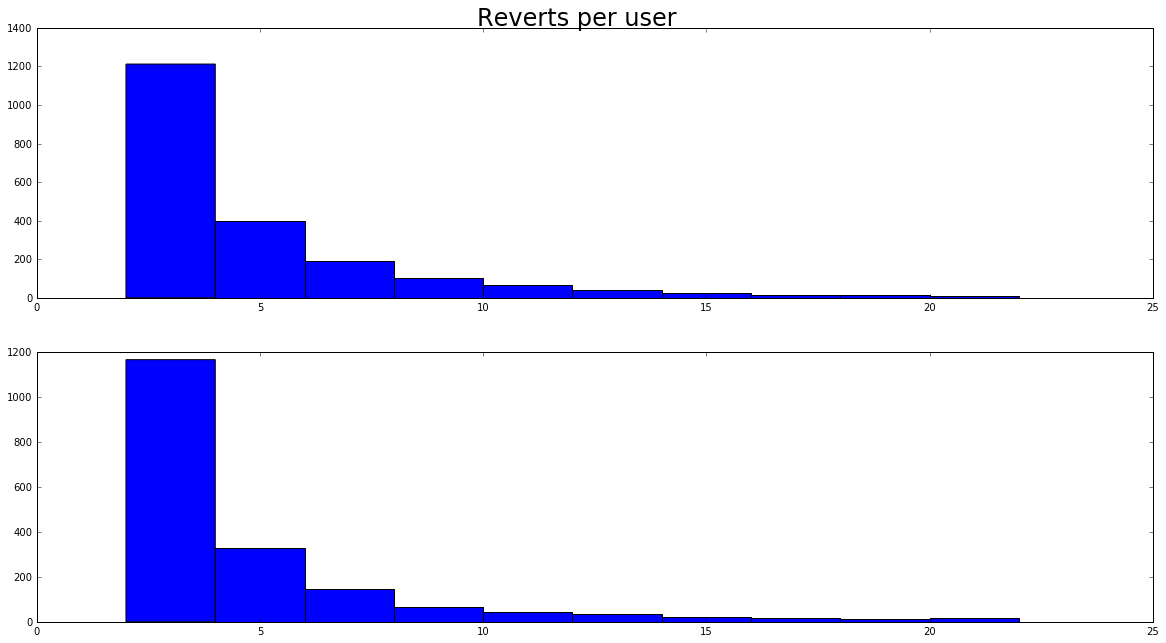

In [27]:
fig, axarr = plt.subplots( 2, 1, figsize=(20,10) )
fig.suptitle("Reverts per user", fontsize=24)
fig.subplots_adjust(top=0.95)

axarr[0].hist(control_reverts, range = (2, 22), bins = 10)
axarr[1].hist(treatment_reverts, range = (2, 22), bins = 10)

# for wiki in wikis:
#     plot_by_wiki(notifs, wiki, ax = axarr[i])
#     i = i + 1

# def plot_by_wiki( df, wiki, range = (5, 104), bins = 20, ax = plt ): 
#     dist = filter_by_wiki( df, wiki )
#     ax.hist( dist.iloc[:, 0], bins = bins, range = range, weights = dist.iloc[:, 1])
#     ax.set_title(wiki)
#     ax.set_xlabel( "Number of notifications" )
#     ax.set_ylabel( "Users" )

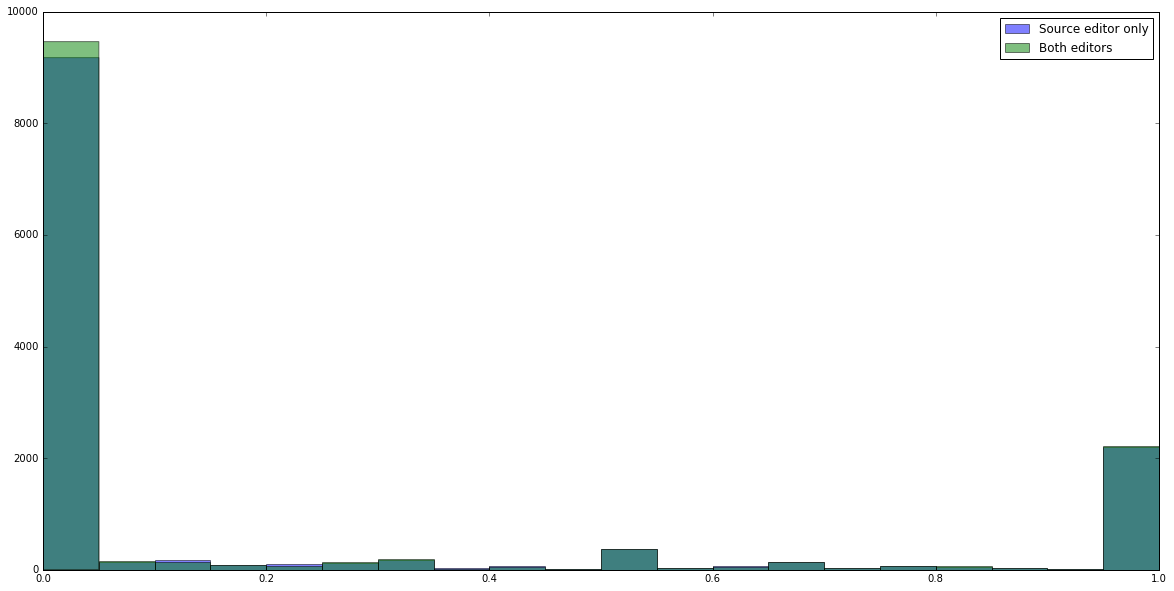

In [76]:
fig, axarr = plt.subplots( 1, 1, figsize=(20,10) )
plt.hist(control_rv_prop, alpha = 0.5, range = (0, 1), bins = 20, label = "Source editor only")
plt.hist(treatment_rv_prop, alpha = 0.5, range = (0, 1), bins = 20, label = "Both editors")
plt.legend(loc="upper right")
plt.show()

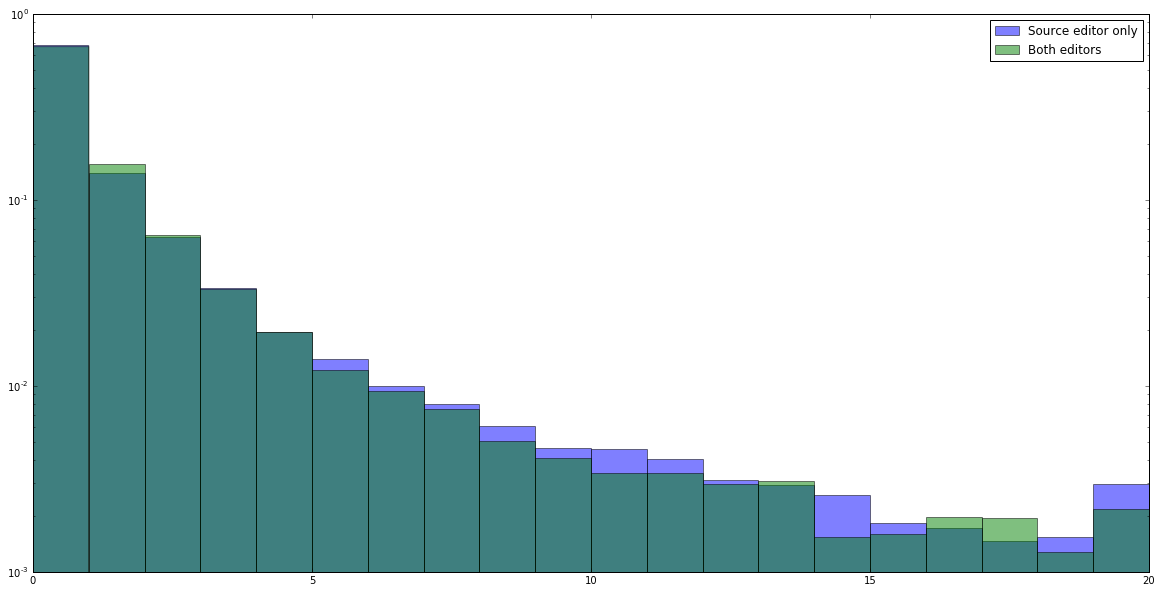

In [72]:
fig, axarr = plt.subplots( 1, 1, figsize=(20,10) )
plt.hist(control_by_revs, log = True, alpha = 0.5, range = (0, 20), normed = 1, bins = 20, label = "Source editor only")
plt.hist(treatment_by_revs, log = True, alpha = 0.5, range = (0, 20), normed = 1, bins = 20, label = "Both editors")
plt.legend(loc="upper right")
plt.show()

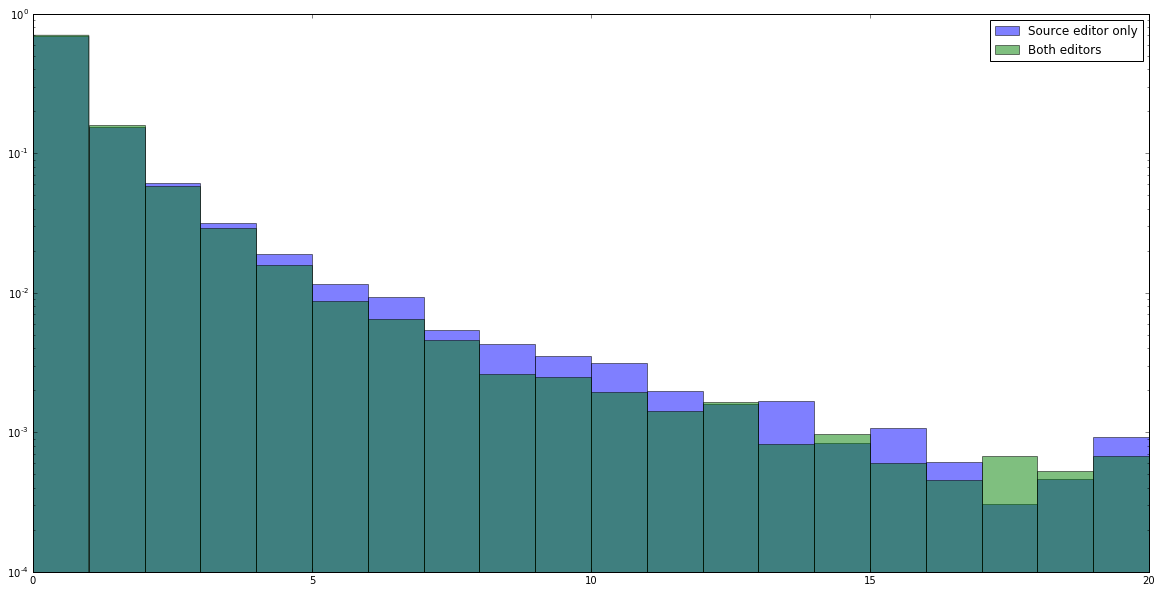

In [74]:
fig, axarr = plt.subplots( 1, 1, figsize=(20,10) )
plt.hist(control_reverts, log = True, alpha = 0.5, range = (0, 20), normed = 1, bins = 20, label = "Source editor only")
plt.hist(treatment_reverts, log = True, alpha = 0.5, range = (0, 20), normed = 1, bins = 20, label = "Both editors")
plt.legend(loc="upper right")
plt.show()

## Long-term survival

Proportion who made at least one edit more than a month after registering.
Chi squared test.

In [21]:
import datetime as dt
window = dt.timedelta( days = 60 )
revs_windowed = revs[ revs["rev_timestamp"] < ( revs["registration"] + window ) ]

month = dt.timedelta( days = 30 )
survived_revs = revs_windowed[ revs_windowed["rev_timestamp"] > ( revs_windowed["registration"] + month ) ]

survivors = pd.DataFrame( survived_revs[ "user_id" ].unique() )
survivors.rename( columns = { 0: "user_id" }, inplace=True )
survivors.loc[ :, "survived" ] = pd.Series( 1, index = survivors.index )

survival = pd.merge( users, survivors, on="user_id", how="left" )
survival.survived.fillna( 0, inplace = True )

treatment_survivors = survival[ ( survival["survived"] == 1 ) & ( survival["bucket"] == "treatment" ) ].count( )[ "user_id" ]
control_survivors = survival[ ( survival["survived"] == 1 ) & ( survival["bucket"] == "control" ) ].count( )[ "user_id" ]
    
verbose_chisquared( "treatment", n_treatment, treatment_survivors, "control", n_control, control_survivors )

treatment n: 38365
treatment k: 1100
treatment rate: 0.0286719666363
-----
control n: 38493
control k: 1081
control rate: 0.028083028083
-----
Power_divergenceResult(statistic=0.23485578752524316, pvalue=0.62794647801854031)


That's disappointing, particularly considering that a promising resulting on this test was my main motivation for doing this follow-up. But clearly, there's nothing here.

## Long-term survival filtered ##

Just to see what happens, let's see how it looks if we filter out all the users who never made an edit before checking survival. The fact that there's no significant difference in the rate of any editing means we're not introducing a new bias here.

In [81]:
import datetime as dt

window = dt.timedelta( days = 60 )
revs_windowed = revs[ revs["rev_timestamp"] < ( revs["registration"] + window ) ]

month = dt.timedelta( days = 30 )
survived_revs = revs_windowed[ revs_windowed["rev_timestamp"] > ( revs_windowed["registration"] + month ) ]

survivors = pd.DataFrame( survived_revs[ "user_id" ].unique() )
survivors.rename( columns = { 0: "user_id" }, inplace=True )
survivors.loc[ :, "survived" ] = pd.Series( 1, index = survivors.index )

survival = pd.merge( users, survivors, on="user_id", how="left" )
survival.survived.fillna( 0, inplace = True )

n_treatment = len( survival[ ( survival["revs"] >= 1 ) & ( survival["bucket"] == "treatment" ) ] )
n_control = len( survival[ ( survival["revs"] >= 1 ) & ( survival["bucket"] == "control" ) ] )
treatment_survivors = survival[ ( survival["survived"] == 1 ) & ( survival["bucket"] == "treatment" ) ].count( )[ "user_id" ]
control_survivors = survival[ ( survival["survived"] == 1 ) & ( survival["bucket"] == "control" ) ].count( )[ "user_id" ]

verbose_chisquared( "treatment", n_treatment, treatment_survivors, "control", n_control, control_survivors )

treatment n: 13343
treatment k: 1100
treatment rate: 0.0824402308326
-----
control n: 13126
control k: 1081
control rate: 0.0823556300472
-----
Power_divergenceResult(statistic=0.00057475004009485578, pvalue=0.98087339158983755)


Wow, even farther from significant than before. As I said, nothing here.